In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import sklearn
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#feature engr'ing
from sklearn.preprocessing import OneHotEncoder

#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import cross_validate

#ignore some warnings we dont care about
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
names = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours','red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
dataset = pd.read_csv('flag.data',names=names,usecols=[*range(len(names))])

print(dataset.head(5))

             name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colours  ...  saltires  quarters  sunstars  crescent  triangle  \
0        3        5  ...         0         0         1         0         0   
1        0        3  ...         0         0         1         0         0   
2        0        3  ...         0         0         1         1         0   
3        0        5  ...         0         0         0         0         1   
4        0        3  ...         0         0         0         0         0   

   icon  animate text  topleft  botright  
0

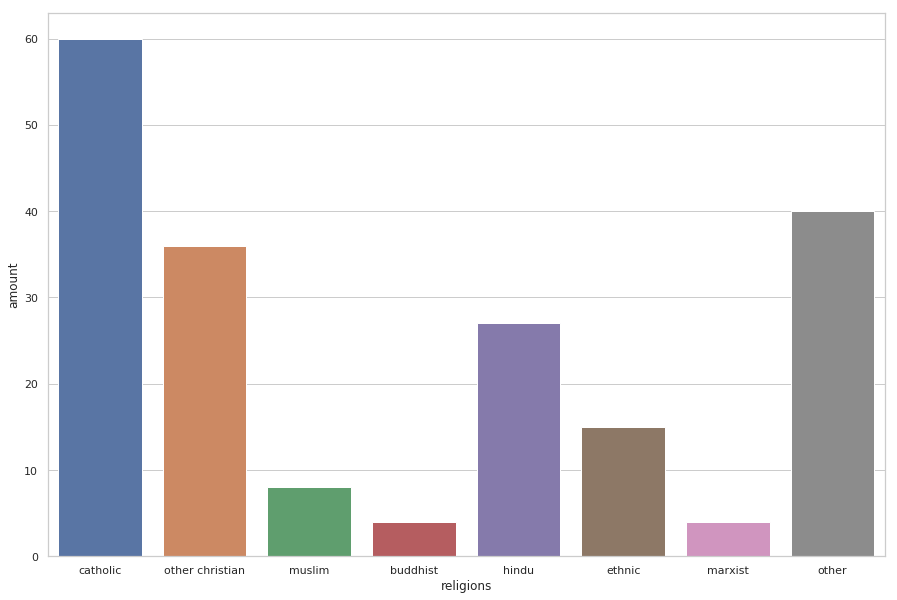

In [22]:
religions = [0, 0, 0, 0, 0, 0, 0,0]
for i in range(len(dataset['religion'])):
    religions[int(dataset['religion'][i] - 1)] += 1
religions = pd.DataFrame(np.array(religions).reshape(1,8))
religions.columns = ['catholic','other christian','muslim','buddhist','hindu',
                     'ethnic','marxist','other']


sns.set(style="whitegrid")
ax = sns.barplot(data=religions)
ax.set(xlabel='religions', ylabel='amount')
sns.set(rc={'figure.figsize':(15,10)})


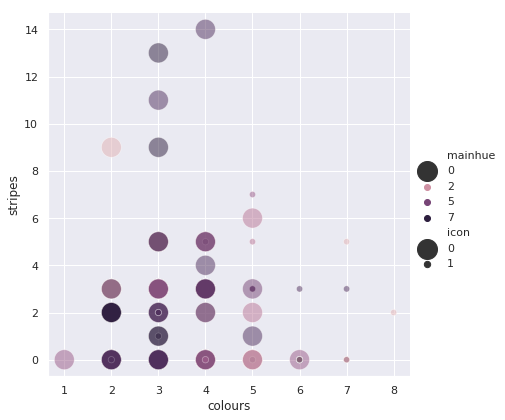

In [4]:
w = dataset['mainhue'].astype('category')
w = w.cat.codes
x = dataset['colours']
y = dataset['stripes']
z = dataset['icon']

data = pd.concat([x,y],axis=1,sort=False)
data = pd.concat([data,z],axis=1,sort=False)
data = pd.concat([data,w],axis=1,sort=False)
data.columns = ['colours','stripes','icon','mainhue']
#print(data)

sns.relplot(x="colours", y="stripes", hue="mainhue", size="icon",sizes=(40, 400), 
            alpha=.5,height=6, data=data)

In [5]:
topleft = dataset['topleft'].astype('category')
topleft = topleft.cat.codes
dataset['topleft'] = topleft

botright = dataset['botright'].astype('category')
botright = botright.cat.codes
dataset['botright'] = botright

In [6]:
columnName = dataset.columns.values[17]
print(columnName)
valsToOHE = dataset[columnName].values
print(valsToOHE)
OHEr = OneHotEncoder(sparse=False)
valsToOHE = valsToOHE.reshape(len(valsToOHE), 1)
OHEd = OHEr.fit_transform(valsToOHE)
print(len(np.transpose(OHEd)))


mainhue
['green' 'red' 'green' 'blue' 'gold' 'red' 'white' 'red' 'blue' 'blue'
 'blue' 'red' 'blue' 'red' 'green' 'blue' 'gold' 'blue' 'green' 'red'
 'orange' 'red' 'blue' 'green' 'blue' 'gold' 'red' 'red' 'red' 'red'
 'gold' 'red' 'gold' 'blue' 'gold' 'gold' 'red' 'red' 'gold' 'green' 'red'
 'blue' 'blue' 'blue' 'white' 'white' 'red' 'blue' 'green' 'blue' 'gold'
 'black' 'blue' 'green' 'green' 'white' 'blue' 'blue' 'white' 'white'
 'white' 'red' 'green' 'red' 'gold' 'black' 'red' 'white' 'blue' 'white'
 'gold' 'blue' 'blue' 'gold' 'gold' 'green' 'black' 'blue' 'blue' 'red'
 'blue' 'orange' 'red' 'red' 'red' 'white' 'white' 'white' 'white' 'green'
 'white' 'black' 'red' 'red' 'red' 'green' 'red' 'red' 'blue' 'red'
 'green' 'red' 'red' 'red' 'red' 'red' 'red' 'gold' 'red' 'blue' 'green'
 'red' 'green' 'blue' 'red' 'red' 'blue' 'red' 'gold' 'blue' 'brown' 'red'
 'white' 'blue' 'blue' 'orange' 'green' 'gold' 'blue' 'red' 'red' 'red'
 'green' 'red' 'black' 'red' 'red' 'blue' 'white' 'red' 

In [7]:
for i in [2,5,17,28,29]:
    columnName = dataset.columns.values[i]
    valsToOHE = dataset[columnName].values

    #One-Hot Encoding
    OHEr = OneHotEncoder(sparse=False)
    valsToOHE = valsToOHE.reshape(len(valsToOHE), 1)
    OHEd = OHEr.fit_transform(valsToOHE)

    #add new OHE columns and put total back at the end
    for j in range(len(np.transpose(OHEd))):
        dataset[str(columnName + str(j))] = np.transpose(OHEd)[j]

print(dataset.head(5))

             name  landmass  zone  area  population  language  religion  bars  \
0     Afghanistan         5     1   648          16        10         2     0   
1         Albania         3     1    29           3         6         6     0   
2         Algeria         4     1  2388          20         8         2     2   
3  American-Samoa         6     3     0           0         1         1     0   
4         Andorra         3     1     0           0         6         0     3   

   stripes  colours  ...  topleft5  topleft6  botright0  botright1  botright2  \
0        3        5  ...       0.0       0.0        0.0        0.0        0.0   
1        0        3  ...       1.0       0.0        0.0        0.0        0.0   
2        0        3  ...       0.0       0.0        0.0        0.0        0.0   
3        0        5  ...       0.0       0.0        0.0        0.0        0.0   
4        0        3  ...       0.0       0.0        0.0        0.0        0.0   

   botright3  botright4 bo

In [8]:
dataset = dataset.drop(columns=['name','zone',
              'language','mainhue','topleft','botright'],axis=1)
print(dataset.head(5))

   landmass  area  population  religion  bars  stripes  colours  red  green  \
0         5   648          16         2     0        3        5    1      1   
1         3    29           3         6     0        0        3    1      0   
2         4  2388          20         2     2        0        3    1      1   
3         6     0           0         1     0        0        5    1      0   
4         3     0           0         0     3        0        3    1      0   

   blue  ...  topleft5  topleft6  botright0  botright1  botright2  botright3  \
0     0  ...       0.0       0.0        0.0        0.0        0.0        0.0   
1     0  ...       1.0       0.0        0.0        0.0        0.0        0.0   
2     0  ...       0.0       0.0        0.0        0.0        0.0        0.0   
3     1  ...       0.0       0.0        0.0        0.0        0.0        0.0   
4     1  ...       0.0       0.0        0.0        0.0        0.0        0.0   

   botright4  botright5  botright6  botright

In [19]:
columns = dataset.columns.tolist()
columns1 = columns[0:3] + columns[4:]
columns1.insert(0,columns[3])

dataset = dataset[columns1]

array = dataset.values
X = array[:,1:61]
Y = array[:,0]
print(Y)
validation_size = 0.20
seed = 11
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)

results = []

[2. 6. 2. 1. 0. 5. 1. 1. 0. 0. 1. 0. 1. 2. 2. 1. 0. 1. 5. 1. 3. 0. 5. 0.
 1. 2. 6. 5. 3. 5. 1. 1. 0. 1. 5. 5. 0. 6. 0. 2. 5. 1. 0. 6. 1. 6. 1. 2.
 1. 0. 0. 2. 0. 5. 1. 1. 1. 1. 1. 0. 0. 0. 5. 5. 6. 1. 5. 1. 1. 1. 1. 1.
 0. 2. 5. 4. 0. 0. 3. 6. 1. 4. 2. 2. 2. 0. 7. 0. 5. 1. 7. 2. 3. 5. 1. 2.
 6. 2. 5. 5. 2. 0. 0. 1. 5. 2. 2. 2. 0. 1. 2. 4. 0. 1. 0. 6. 1. 2. 5. 1.
 4. 1. 1. 1. 0. 2. 2. 1. 6. 2. 1. 2. 2. 0. 5. 0. 0. 0. 6. 0. 0. 2. 6. 5.
 0. 0. 2. 2. 1. 5. 3. 1. 2. 1. 7. 2. 0. 3. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2.
 3. 5. 3. 7. 1. 1. 2. 2. 1. 1. 2. 5. 1. 0. 1. 1. 6. 1. 0. 0. 6. 1. 6. 5.
 5. 5.]


In [20]:
scoring = 'accuracy'
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.617917 (0.093133)
LDA: 0.592083 (0.118167)
KNN: 0.307917 (0.150375)
CART: 0.617500 (0.143938)
NB: 0.561667 (0.116916)


/home/adam/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/adam/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/adam/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/adam/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/adam/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/adam/.local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/hom

SVM: 0.321250 (0.181137)


In [21]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(cv_results.mean())

0.6179166666666667
